In [1]:
# Import the necessary modules and libraries
import numpy as np
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

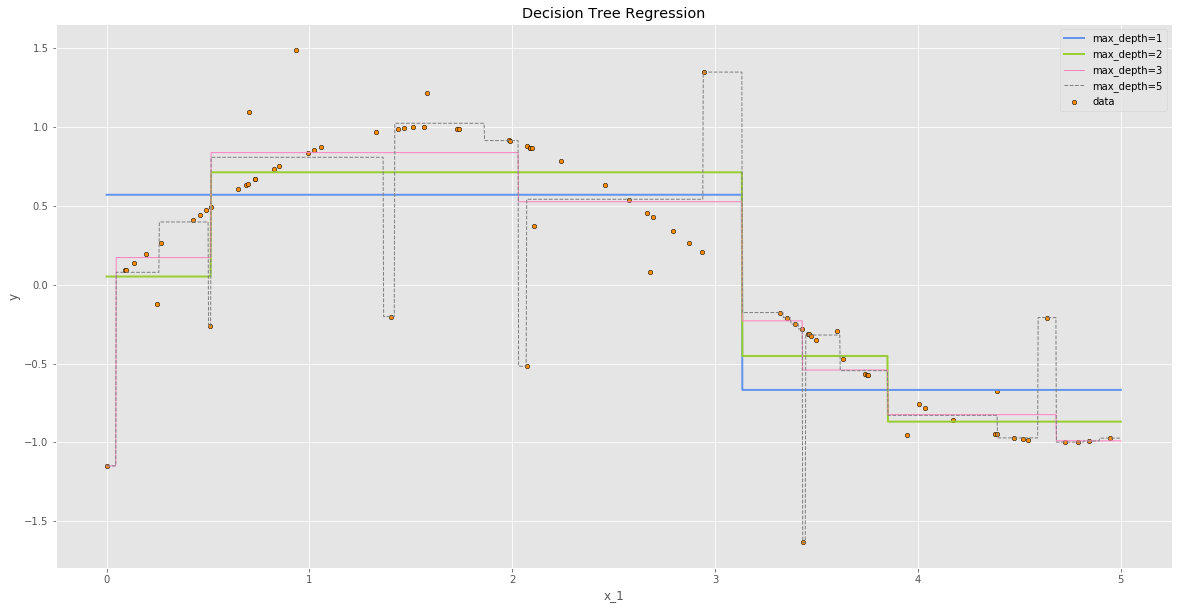

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)

#create a sin graph with random points
y = np.sin(X).ravel()

#add random fluctations to the points
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
tree_1 = DecisionTreeRegressor(max_depth=1)
tree_2 = DecisionTreeRegressor(max_depth=2)
tree_3 = DecisionTreeRegressor(max_depth=3)
tree_4 = DecisionTreeRegressor(max_depth=5)
tree_1.fit(X, y)
tree_2.fit(X, y)
tree_3.fit(X, y)
tree_4.fit(X, y)

# Get our Predictions
# for plotting purposes, create synthetics
synth_X = np.linspace(0,5,2000).reshape(-1,1)
y_preds1 = tree_1.predict(synth_X)
y_preds2 = tree_2.predict(synth_X)
y_preds3 = tree_3.predict(synth_X)
y_preds4 = tree_4.predict(synth_X)

# Plot the results
#plt.figure(figsize=(20,10))
plt.figure(figsize=(20, 10))

#plot datapoints
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

#plot our predictions
plt.plot(synth_X, y_preds1, color="cornflowerblue",label="max_depth=1", linewidth=2)
plt.plot(synth_X, y_preds2, color="yellowgreen", label="max_depth=2", linewidth=2)
plt.plot(synth_X, y_preds3, color="xkcd:pink", label="max_depth=3", linewidth=1)
plt.plot(synth_X, y_preds4, color='grey', label='max_depth=5', linewidth=1, linestyle='dashed')

#label axes
plt.xlabel("x_1")
plt.ylabel("y")
plt.title("Decision Tree Regression")

#show the graph
plt.legend()
plt.show()

There is a nice visualization of a 3d decision tree if you would like to see it here: http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os, sys

def get_tree_graph(tree):
    def conda_fix(graph):
            path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
            paths = ("dot", "twopi", "neato", "circo", "fdp")
            paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
            graph.set_graphviz_executables(paths)

    dot_data = StringIO() 

    export_graphviz(tree, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

    conda_fix(graph)
    
    #tree_1 max_depth1
    return Image(graph.create_png())

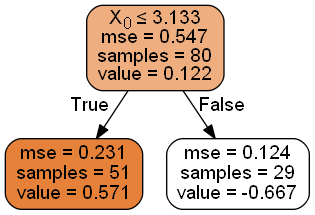

In [4]:
get_tree_graph(tree_1)

value refers to mean

X_0 refers to the value on the x-axis where the fit lines are splited

As the depth goes up, the mse approach to 0.

the samples refers to the number of the data in that domain

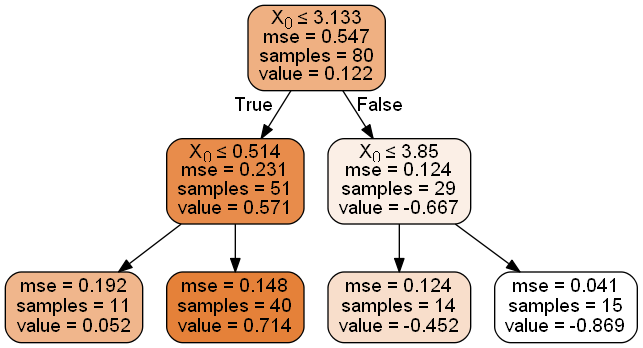

In [5]:
get_tree_graph(tree_2)

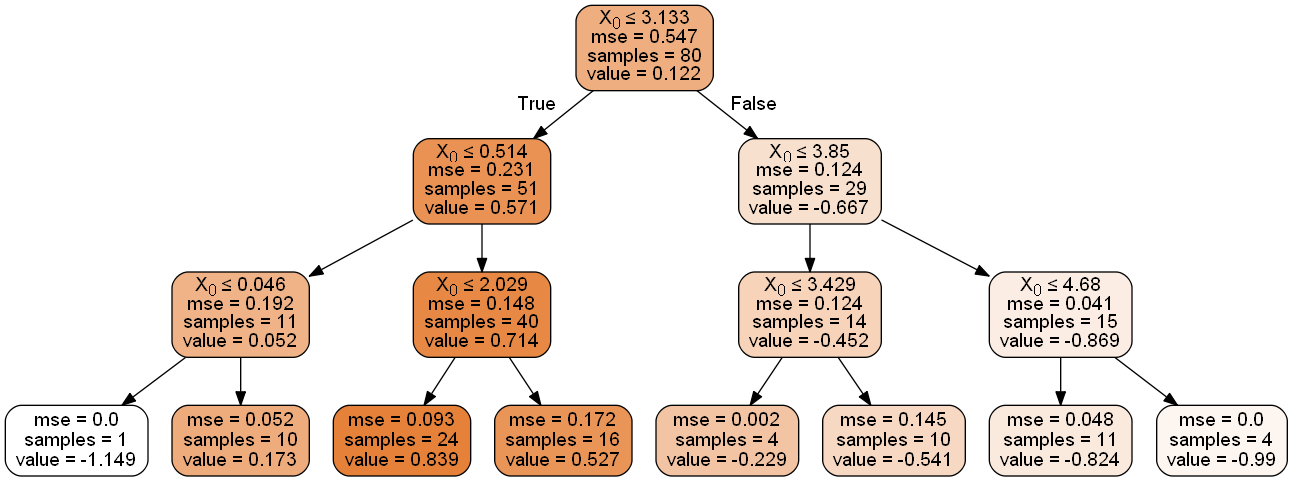

In [6]:
#tree_3 max_depth3
get_tree_graph(tree_3)

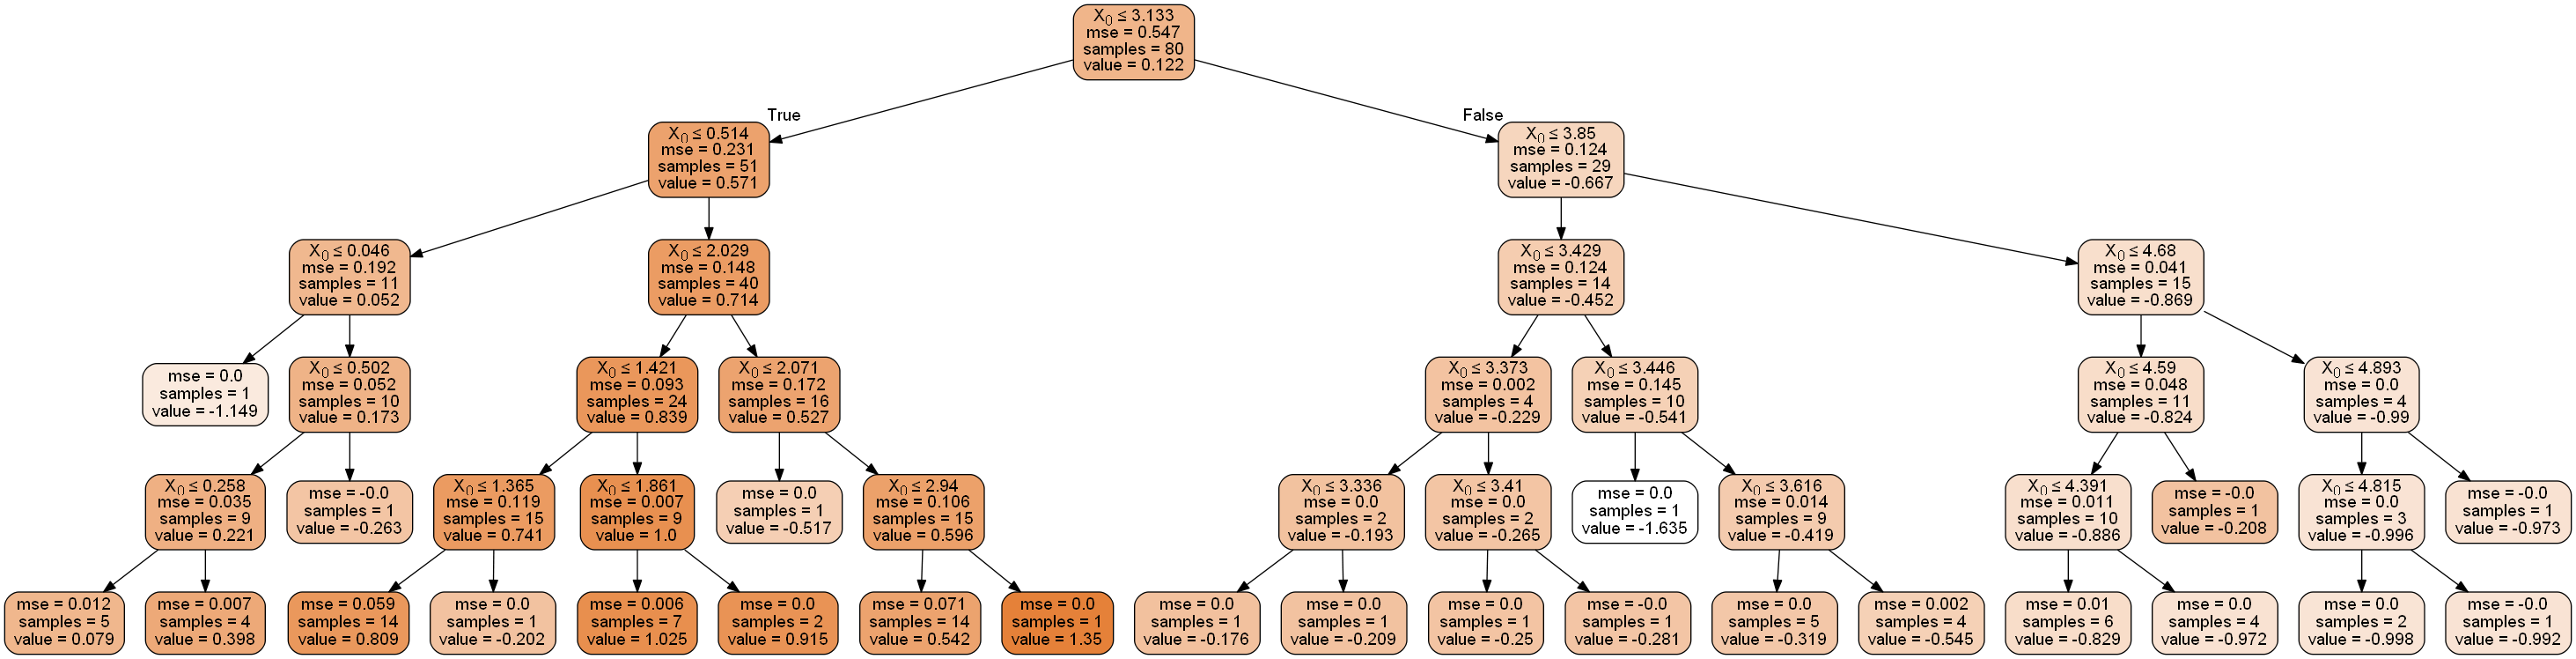

In [7]:
#tree_4 max_depth5
get_tree_graph(tree_4)